In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
hour_df = pd.read_csv('hour.csv')
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [3]:
hour_df=hour_df.rename(columns={'instant':'rec_id','dteday':'datetime','holiday':'is_holiday','workingday':'is_workingday','weathersit':'weather_condition','hum':'humidity','mnth':'month','cnt':'total_count','hr':'hour','yr':'year'})
df=pd.DataFrame(data=hour_df)

In [4]:
df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df['datetime'] = pd.to_datetime(hour_df.datetime)


In [6]:
df.shape

(17379, 17)

In [7]:
df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
df.dtypes

rec_id                        int64
datetime             datetime64[ns]
season                        int64
year                          int64
month                         int64
hour                          int64
is_holiday                    int64
weekday                       int64
is_workingday                 int64
weather_condition             int64
temp                        float64
atemp                       float64
humidity                    float64
windspeed                   float64
casual                        int64
registered                    int64
total_count                   int64
dtype: object

In [9]:
df.describe()

,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

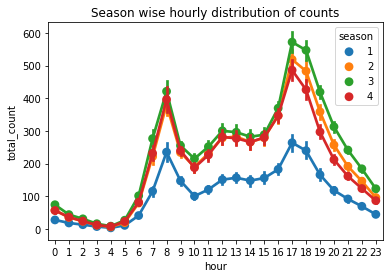

In [10]:
fig,ax = plt.subplots()
sn.pointplot(data=hour_df[['hour',
                           'total_count',
                           'season']],
             x='hour',y='total_count',
             hue='season',ax=ax)
ax.set(title="Season wise hourly distribution of counts")

[Text(0.5, 1.0, 'Box Pot for hourly distribution of counts')]

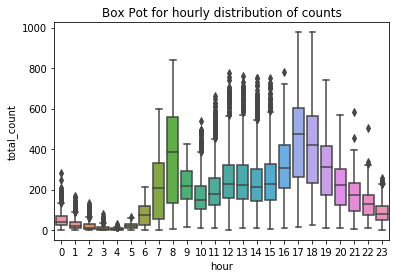

In [11]:

fig,ax = plt.subplots()
sn.boxplot(data=hour_df[['hour','total_count']],x="hour",y="total_count",ax=ax)
ax.set(title="Box Pot for hourly distribution of counts")

[Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')]

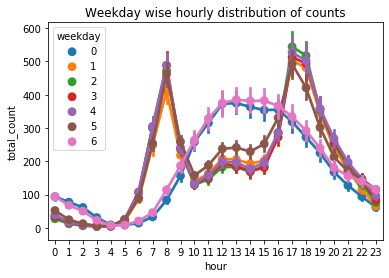

In [12]:
fig,ax = plt.subplots()
sn.pointplot(data=hour_df[['hour','total_count','weekday']],x='hour',y='total_count',hue='weekday',ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

In [13]:
df=df.drop("datetime",axis=1)

In [14]:
df.head()

,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [15]:
x=df.iloc[:,:-3].values

In [16]:
y=df.iloc[:,-1].values

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)



In [18]:
x.shape

(17379, 13)

In [19]:
y=y.reshape(-1,1)

In [20]:

y=sc.fit_transform(y)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=45)

In [22]:
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(y_test.shape)

(13903, 13)
(13903, 1)
(3476, 1)
(3476, 1)


In [23]:
dtr = DecisionTreeRegressor(max_depth=4,
                            min_samples_split=5,
                            max_leaf_nodes=10)
dtr.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [24]:
dtr.score(x,y)

0.5759993804521246

In [25]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.coef_
    
    

array([[-0.21178016,  0.1127542 ,  0.409413  ,  0.11015409,  0.29378096,
        -0.01986422,  0.02251284,  0.01136685, -0.01368067,  0.114916  ,
         0.18897717, -0.20984413,  0.02302996]])

In [26]:
lm.intercept_

array([-0.00341445])

In [27]:
lm.score(x_train,y_train)

0.38685892632943875

In [28]:
from sklearn.metrics import mean_squared_error
pred=lm.predict(x_test)
print("predicted result Target",pred)
print("actual Target",y_test)


predicted result Target [[-0.01129701]
 [ 1.02486151]
 [ 0.29933716]
 ...
 [ 0.28196396]
 [ 0.58272166]
 [-0.10857617]]
actual Target [[-0.99493174]
 [ 0.52120229]
 [ 1.5025545 ]
 ...
 [ 0.66454587]
 [ 1.94361168]
 [-0.81299566]]


In [29]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.3960297593853229


In [30]:
def linreg():
    lm.fit(x,y)
    print(lm.score(x,y))
    print(r2_score(y_test,pred))
    print(mean_squared_error(y_test,pred))

In [31]:
linreg()

0.38889177764069494
0.3960297593853229
0.6099334804305645


In [32]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100, 500, 800],
              }

In [33]:
grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=5)

In [ ]:
grid_cv_dtr.fit(x,y)

In [ ]:
print("R-Squared::{}".format(grid_cv_dtr.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtr.best_params_))

In [ ]:
grid_model=grid_cv_dtr

In [ ]:
from sklearn.externals import joblib

In [ ]:
joblib.dump(grid_model,"gridsave")